<a href="https://colab.research.google.com/github/benku123/Machine_leraning_Concepts/blob/main/Decision_Boundries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial to Final Decision Boundries

In [1]:
import numpy as np

import matplotlib.pyplot as plt



X = np.array([[4.7,	1.4], [4.5,	1.5],[4.9,	1.5],[4,	1.3], [4.6,	1.5], [4.5,	1.3], [4.7,	1.6], [3.3,	1], [4.6,	1.3], [3.9,	1.4], [3.5,	1], [4.2,	1.5], [4,	1], [4.7,	1.4], 
                     [3.6,	1.3], [4.4,	1.4], [4.5,	1.5], [4.1,	1], [4.5,	1.5], [3.9,	1.1], [4.8,	1.8], [4,	1.3], [4.9,	1.5], [4.7,	1.2], [4.3,	1.3], [4.4,	1.4], [4.8,	1.4], 
                     [5, 1.7], [4.5,	1.5], [3.5,	1], [3.8,	1.1], [3.7,	1], [3.9,	1.2], [5.1,	1.6], [4.5,	1.5], [4.5,	1.6], [4.7,	1.5], [4.4,	1.3], [4.1,	1.3], [4,	1.3], 
                     [4.4,	1.2], [4.6,	1.4], [4,	1.2], [3.3,	1], [4.2,	1.3], [4.2,	1.2], [4.2,	1.3], [4.3,	1.3], [3,	1.1], [4.1,	1.3], [6,	2.5], [5.1,	1.9], [5.9,	2.1], 
                     [5.6,	1.8], [5.8,	2.2], [6.6,	2.1], [4.5,	1.7], [6.3,	1.8], [5.8,	1.8], [6.1,	2.5], [5.1,	2], [5.3,	1.9], [5.5,	2.1], [5,	2], [5.1,	2.4], [5.3,	2.3], 
                     [5.5,	1.8], [6.7,	2.2], [6.9,	2.3], [5,	1.5], [5.7,	2.3], [4.9,	2], [6.7,	2], [4.9,	1.8], [5.7,	2.1], [6,	1.8], [4.8,	1.8], [4.9,	1.8], [5.6,	2.1], 
                     [5.8,	1.6], [6.1,	1.9], [6.4,	2], [5.6,	2.2], [5.1,	1.5], [5.6,	1.4], [6.1,	2.3], [5.6,	2.4], [5.5,	1.8], [4.8,	1.8], [5.4,	2.1], [5.6,	2.4], [5.1,	2.3], 
                     [5.1,	1.9], [5.9,	2.3], [5.7,	2.5], [5.2,	2.3], [5,	1.9], [5.2,	2], [5.4,	2.3], [5.1,	1.8]])
y = np.concatenate((np.zeros(50), np.ones(50)))


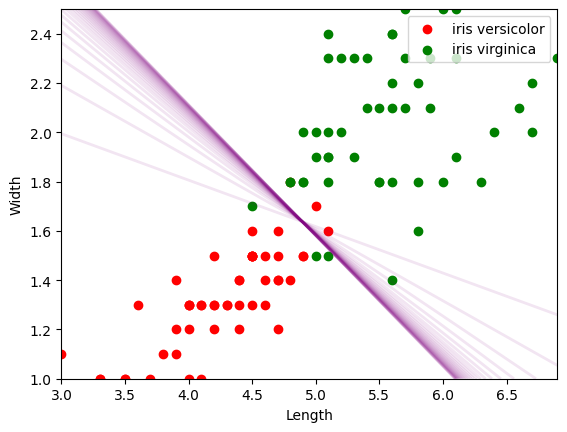

In [2]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

def fit_logistic_regression(X, y,lr, num_iter, fit_intercept=True):
    if fit_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))

    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-z))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
    
        if i % 10000 == 0:
            xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
            grid = np.c_[xx1.ravel(), xx2.ravel()]
            probs = 1 / (1 + np.exp(-(np.dot(np.hstack((np.ones((grid.shape[0], 1)), grid)), theta)).reshape(xx1.shape)))
            plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='purple', alpha=0.1)

    return theta

def predict_prob(theta, X, fit_intercept=True):
    if fit_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))

    return 1 / (1 + np.exp(-(np.dot(X, theta))))

def predict(theta, X, threshold=0.5):
    return predict_prob(theta, X) >= threshold

theta = fit_logistic_regression(X, y, 0.1,300000)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label="iris versicolor")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c="green", label="iris virginica")

plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(loc='upper right')
plt.show()